In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf
import numpy as np

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

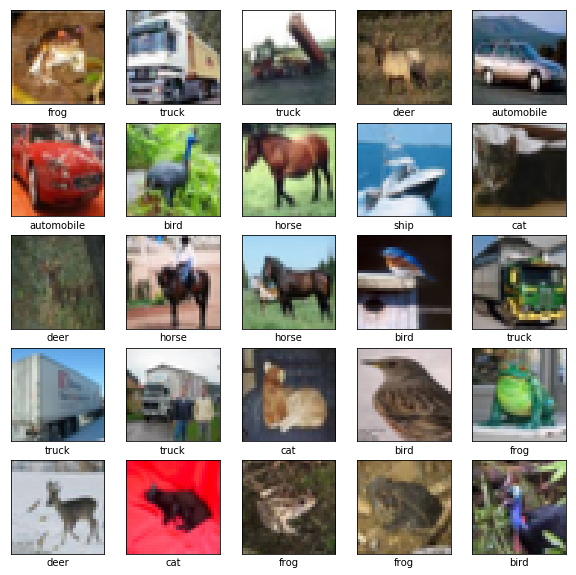

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [3]:
model = tf.keras.models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(1024, activation='relu', use_bias=True),
    layers.Dense(10, activation='softmax', use_bias=True)
])

model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [4]:
from datetime import datetime
# Define the Keras TensorBoard callback.

# Train the model.
history = model.fit(
    train_images,
    train_labels, 
    epochs=20)

Train on 50000 samples
Epoch 1/20
50000/50000 [==============================] - 34s 674us/sample - loss: 1.8514 - accuracy: 0.3405
Epoch 2/20
50000/50000 [==============================] - 31s 613us/sample - loss: 1.6719 - accuracy: 0.4127
Epoch 3/20
50000/50000 [==============================] - 29s 589us/sample - loss: 1.5948 - accuracy: 0.4412
Epoch 4/20
50000/50000 [==============================] - 31s 616us/sample - loss: 1.5409 - accuracy: 0.4603
Epoch 5/20
50000/50000 [==============================] - 36s 717us/sample - loss: 1.4984 - accuracy: 0.4767
Epoch 6/20
50000/50000 [==============================] - 47s 942us/sample - loss: 1.4609 - accuracy: 0.4891
Epoch 7/20
50000/50000 [==============================] - 33s 659us/sample - loss: 1.4301 - accuracy: 0.4993
Epoch 8/20
50000/50000 [==============================] - 32s 649us/sample - loss: 1.4014 - accuracy: 0.5092
Epoch 9/20
50000/50000 [==============================] - 42s 842us/sample - loss: 1.3758 - accuracy: 0.5

['loss', u'accuracy']


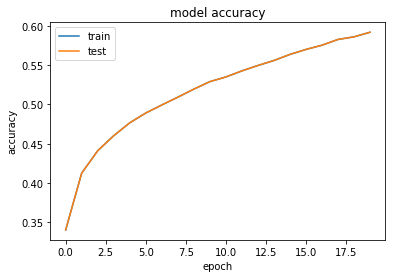

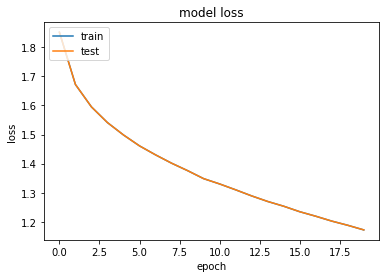

In [5]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history[u'accuracy'])
plt.plot(history.history[u'accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
model.evaluate(test_images,  test_labels, verbose=2)

10000/1 - 3s - loss: 1.4588 - accuracy: 0.5052


[1.3848810167312622, 0.5052]